In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [15]:
print(df.head())


   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [17]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}, Unique Values: {len(unique_values)}')




Column: Company, Unique Values: 7
Column: Age, Unique Values: 30
Column: Salary, Unique Values: 41
Column: Place, Unique Values: 12
Column: Country, Unique Values: 1
Column: Gender, Unique Values: 2


In [18]:
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [19]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print(df.head())


   company   age  salary     place country  gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [20]:

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [21]:
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (144, 6)


In [25]:
df['age'].replace(0, np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)


print("Missing values after treatment:\n", df.isnull().sum())


Missing values after treatment:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_7644\658891269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7644\658891269.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df = remove_outliers(df, col)

print("Data shape after outlier removal:", df.shape)


Data shape after outlier removal: (112, 6)


In [26]:

filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


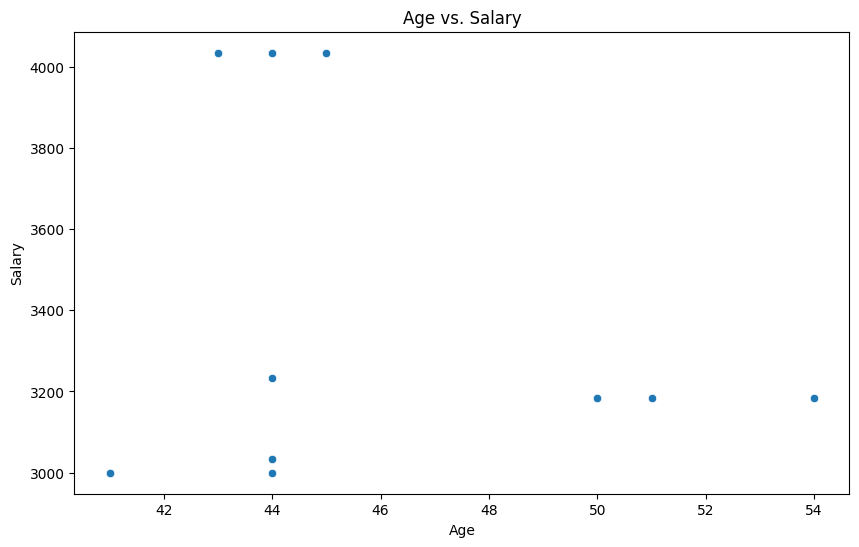

In [29]:
# Plotting age vs. salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', data=filtered_df)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


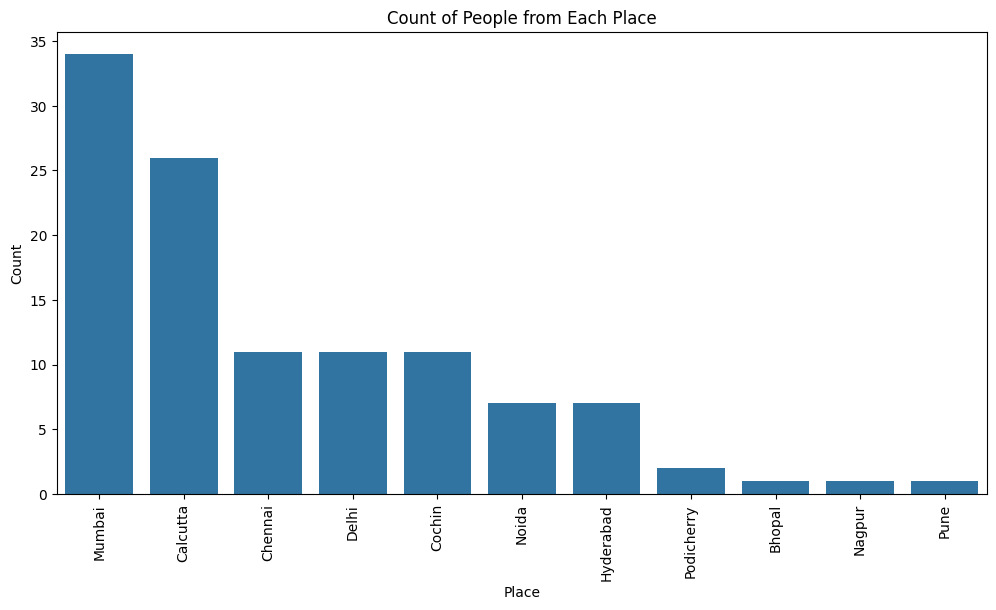

In [30]:

place_counts = df['place'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Count of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())


    age  salary  gender  company_Congnizant  company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0           False           True         False        False       

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
# StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(df_encoded)



In [34]:

df_scaled_standard = pd.DataFrame(scaled_standard, columns=df_encoded.columns)
print(df_scaled_standard.head())


        age    salary  gender  company_Congnizant  company_Infosys  \
0 -1.418278  0.303583     0.0            -0.13484        -0.702377   
1 -0.224836  0.303583     0.0            -0.13484         1.423737   
2  0.371885 -1.123997     0.0            -0.13484        -0.702377   
3  0.968606 -0.753884     0.0            -0.13484         1.423737   
4 -1.060245 -0.225151     0.0            -0.13484        -0.702377   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                 -0.13484     1.266748                          -0.094916   
1                 -0.13484    -0.789423                          -0.094916   
2                 -0.13484     1.266748                          -0.094916   
3                 -0.13484    -0.789423                          -0.094916   
4                 -0.13484     1.266748                          -0.094916   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0       -0.549841       3.0301

In [35]:

scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(df_encoded)

In [36]:
df_scaled_minmax = pd.DataFrame(scaled_minmax, columns=df_encoded.columns)
print(df_scaled_minmax.head())

        age    salary  gender  company_Congnizant  company_Infosys  \
0  0.081081  0.494375     0.0                 0.0              0.0   
1  0.351351  0.494375     0.0                 0.0              1.0   
2  0.486486  0.153078     0.0                 0.0              0.0   
3  0.621622  0.241562     0.0                 0.0              1.0   
4  0.162162  0.367969     0.0                 0.0              0.0   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                      0.0          1.0                                0.0   
1                      0.0          0.0                                0.0   
2                      0.0          1.0                                0.0   
3                      0.0          0.0                                0.0   
4                      0.0          1.0                                0.0   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0             0.0            1